# **Churn Modelling of Promsha Bank**
**Goal : Predict whether the new customers will stay or leave for the data given by the manager.**

***1. Importing all necessary packages***

In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.callbacks import EarlyStopping

***2. Data Preprocessing***

In [2]:
data = pd.read_csv("Churn_Modelling.csv")
data = data.drop(['CustomerId', 'Surname'], axis=1)
categorical_cols = ['Geography', 'Gender']
numerical_cols = [col for col in data.columns if col not in categorical_cols + ['Exited']]
A = data.drop('Exited', axis=1)
b = data['Exited']

***3. Transforming/Scaling categorical and numerical data using OneHotEncoder and StandardScaler respectively***

In [3]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse=False)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

***4. Splitting training and testing data***

In [4]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.3, random_state=42)
A_train = preprocessor.fit_transform(A_train)
A_test = preprocessor.transform(A_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


***5. Create the model with necessary operations like***
```
Sequential() ----> Sequentially stacks layers of Tensors for the model/Neural Network.
Dense() ----> Shrink the data to specified number of neurons along with an activation function.
```



In [10]:
def create_model(optimizer):
    model = Sequential()
    model.add(Dense(64, input_shape=(A_train.shape[1],), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

***6. Model is compiled through various optimizers such as Stochastic Gradient Descent, Adam Optimiser and RMSprop.***

In [11]:
optimizers = [SGD(), Adam(), RMSprop()]
for opt in optimizers:
    model = create_model(opt)
    print(f"Training model with {str(opt)} optimizer...")
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    model.fit(A_train, b_train, epochs=10, batch_size=32, verbose=0)

Training model with <keras.src.optimizers.sgd.SGD object at 0x7b3f5e5fff70> optimizer...
Training model with <keras.src.optimizers.adam.Adam object at 0x7b3f4fe1cd00> optimizer...
Training model with <keras.src.optimizers.rmsprop.RMSprop object at 0x7b3f4fe5dd50> optimizer...


***7. Functions from Sklearn.metrics are used to calculate the Error and Accuracy. Then predict the output using :

```
import tensorflow as tf
model.predict()
```

***

In [13]:
loss, accuracy = model.evaluate(A_test, b_test, verbose=0)
print(f"Evaluation on test set with {str(opt)} optimizer:")
print(f"Loss: {loss:.4f}, Accuracy: {accuracy*100:.2f}%")
b_pred = model.predict(A_test)
b_pred_classes = (b_pred > 0.5).astype("int32")

Evaluation on test set with <keras.src.optimizers.rmsprop.RMSprop object at 0x7b3f4fe5dd50> optimizer:
Loss: 0.3454, Accuracy: 86.00%
94/94 [==============================] - 0s 2ms/step


***8. Creating the confusion matrix of True Values and Predicted Values***


```
confusion_matrix(b_test, b_pred_classes)
```



In [15]:
cm = confusion_matrix(b_test, b_pred_classes)
print("")
print("Confusion Matrix:")
print(cm)
print("Number of customers predicted by the model to stay : ",cm[0][0])
print("Number of customer predicted by the model to churn/exit : ",cm[1][1])



Confusion Matrix:
[[2288  128]
 [ 292  292]]
Number of customers predicted by the model to stay :  2288
Number of customer predicted by the model to churn/exit :  292


***9. Visualisation of Confusion Matrix***

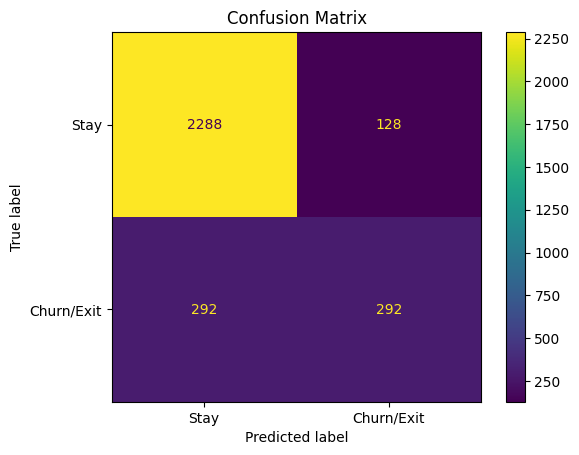

In [16]:
disp = ConfusionMatrixDisplay(cm, display_labels=['Stay','Churn/Exit'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()